In [3]:
# 단어 수준의 원-핫 인코딩(간단한 예)
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.'] # 초기 데이터

token_index = {}
for sample in samples:
    for word in sample.split(): # split() 으로 초기 데이터 샘플을 토큰으로 나누기
        if word not in token_index:
            token_index[word] = len(token_index) + 1    # 단어마다 고유한 인덱스 할당

max_length = 10

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1)) # 결과를 저장할 배열

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [4]:
# 문자 수준의 원-핫 인코딩(간단한 예)
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable   # 출력 가능한 모든 아스키 문자
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1)) # 결과를 저장할 배열

for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1.

print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [5]:
# 케라스를 사용한 단어 수준의 원-핫 인코딩
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words = 1000) # 가장 빈도 높은 1000개의 단어만 선택하도록 tokenizer 객체 생성
tokenizer.fit_on_texts(samples) # 단어 인덱스를 구축

sequences = tokenizer.texts_to_matrix(samples, mode='binary') # 직접 원-핫 이진 벡터 표현을 얻을 수 있다. 원-핫 인코딩 외에 다른 벡터화 방법들도 제공한다.

word_index = tokenizer.word_index   # 계산된 단어 인덱스를 구한다.
print('%s개의 고유한 토큰' % len(word_index))

9개의 고유한 토큰


In [6]:
# 해싱 기법을 사용한 단어 수준의 원-핫 인코딩
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 단어를 크기가 1,000인 벡터로 저장합니다.
# 1,000개(또는 그이상)의 단어가 있다면 해싱 충돌이 늘어나고 인코딩의 정확도가 감소될 것입니다
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 단어를 해싱하여 0과 1,000 사이의 랜덤한 정수 인덱스로 변환합니다.
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [4]:
# embdding 층의 객체 생성
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)

In [5]:
# 데이터 로드 & embedding 층과 분류기 사용
from keras.datasets import imdb
from keras import preprocessing

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentrophy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


ValueError: in user code:

    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:187 __call__
        self.build(y_pred)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:140 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/util/nest.py:635 map_structure
        structure[0], [func(*x) for x in entries],
    /usr/local/lib/python3.7/site-packages/tensorflow/python/util/nest.py:635 <listcomp>
        structure[0], [func(*x) for x in entries],
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:263 _get_loss_object
        loss = losses_mod.get(loss)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1895 get
        return deserialize(identifier)
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1854 deserialize
        printable_module_name='loss function')
    /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:378 deserialize_keras_object
        'Unknown ' + printable_module_name + ': ' + object_name)

    ValueError: Unknown loss function: binary_crossentrophy


In [6]:
#넘파이로 구현한 간단한 RNN
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)

    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

데이터 로딩...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 훈련 시퀸스
25000 테스트 시퀸스
시퀸스 패딩 (samples x time)
input_train 크기:  (25000, 500)
input_test 크기:  (25000, 500)
Epoch 1/10
157/157 [==============================] - 31s 197ms/step - loss: 0.6849 - acc: 0.5454 - val_loss: 0.6444 - val_acc: 0.6452
Epoch 2/10
157/157 [==============================] - 30s 193ms/step - loss: 0.4707 - acc: 0.7865 - val_loss: 0.4747 - val_acc: 0.7848
Epoch 3/10
157/157 [==============================] - 31s 199ms/step - loss: 0.2921 - acc: 0.8845 - val_loss: 0.4183 - val_acc: 0.8100
Epoch 4/10
157/157 [==============================] - 31s 200ms/step - loss: 0.2300 - acc: 0.9115 - val_loss: 0.4586 - val_acc: 0.8128
Epoch 5/10
157/157 [==============================] - 32s 204ms/step - loss: 0.1531 - acc: 0.9441 - val_loss: 0.4379 - val_acc: 0.8416
Epoch 6/10
157/157 [==============================] - 31s 197ms/step - loss: 0.1015 - acc: 0.9660 - val_loss: 0.4874 - val_acc: 0.8178
Epoch 7/10
157/157 [==============================] - 31s 195ms/step - loss: 0.0

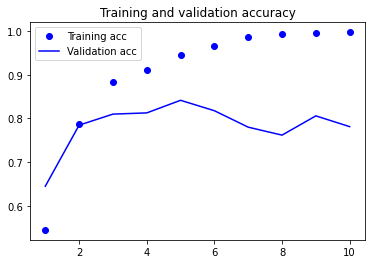

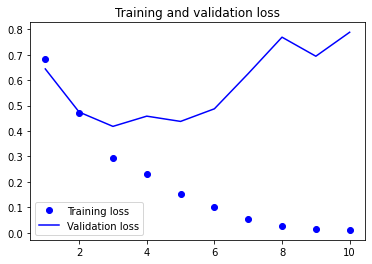

In [8]:
## IMDB 영화 리뷰 분류 문제에 RNN 적용하기
# 데이터 전처리
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features
)
print(len(input_train), '훈련 시퀸스')
print(len(input_test), '테스트 시퀸스')

print('시퀸스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기: ', input_train.shape)
print('input_test 크기: ', input_test.shape)

# embedding 층과 simpleRNN 층을 사용한 모델 훈련
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

# 결과 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()